### **Aplicação do Support Vector Machines (SVM)**
---

#### **Introdução**

Uma **máquina de vetores de suporte** (_SVM_, do inglês: `support-vector machine`) é um conceito na [ciência da computação](https://pt.wikipedia.org/wiki/Ci%C3%AAncia_da_computa%C3%A7%C3%A3o) para um conjunto de métodos de aprendizado supervisionado que analisam os dados e reconhecem padrões, usado para classificação e análise de [regressão](https://pt.wikipedia.org/wiki/Aprendizagem_de_m%C3%A1quina). O SVM padrão toma como entrada um conjunto de dados e prediz, para cada entrada dada, qual de duas possíveis classes a entrada faz parte, o que faz do SVM um classificador linear binário não probabilístico. Dados um conjunto de exemplos de treinamento, cada um marcado como pertencente a uma de duas categorias, um [algoritmo](https://pt.wikipedia.org/wiki/Algoritmo) de treinamento do SVM constrói um modelo que atribui novos exemplos a uma categoria ou outra. Um modelo SVM é uma representação de exemplos como pontos no espaço, mapeados de maneira que os exemplos de cada categoria sejam divididos por um espaço claro que seja tão amplo quanto possível. Os novos exemplos são então mapeados no mesmo espaço e preditos como pertencentes a uma categoria baseados em qual o lado do espaço eles são colocados.

Em outras palavras, o que uma SVM faz é encontrar uma linha de separação, mais comumente chamada de [hiperplano](https://pt.wikipedia.org/wiki/Hiperplano) entre dados de duas classes. Essa linha busca maximizar a distância entre os pontos mais próximos em relação a cada uma das classes, ver imagem:

![](https://upload.wikimedia.org/wikipedia/commons/3/31/%D7%9E%D7%9B%D7%95%D7%A0%D7%AA_%D7%95%D7%95%D7%A7%D7%98%D7%A8%D7%99%D7%9D_%D7%AA%D7%95%D7%9E%D7%9B%D7%99%D7%9D_%D7%93%D7%95%D7%92%D7%9E%D7%90.jpg)

Essa distância entre o _hiperplano_ e o primeiro ponto de cada classe costuma ser chamada de margem. A SVM coloca em primeiro lugar a classificação das classes, definindo assim cada ponto pertencente a cada uma das classes, e em seguida maximiza a margem. Ou seja, ela primeiro classifica as classes corretamente e depois em função dessa restrição define a distância entre as margens.

**Algumas características:**

- Em caso de [outlier](https://pt.wikipedia.org/wiki/Outlier) a SVM busca a melhor forma possível de classificação e, se necessário, desconsidera o outlier;
- Funciona muito bem em domínios complicados, em que existe uma clara margem de separação;
- Não funciona bem em conjuntos de dados muito grandes, pois exige [inversão de matriz](https://pt.wikipedia.org/wiki/Matriz_inversa) - aumentando a [complexidade computacional](https://pt.wikipedia.org/wiki/Complexidade_computacional_de_opera%C3%A7%C3%B5es_matem%C3%A1ticas) com até o cubo do volume de dados;
- Não funciona bem em conjunto de dados com grande quantidade de ruídos;
Se as classes estiverem muito sobrepostas deve-se utilizar apenas evidências independentes (devido ao fato de não ser muito bom com dados com muitos ruídos);

**Fonte:** [Wikipedia](https://pt.wikipedia.org/wiki/M%C3%A1quina_de_vetores_de_suporte)

#### **Praticando...**

Para atividade prática da utilização do `SVM`, utilizarei o conjunto de dados do [Kaggle](https://www.kaggle.com/) que pode acessar através desse [link](https://www.kaggle.com/prathamtripathi/drug-classification).

**Contexto**

O nosso desafio é _prever_ o resultado dos medicamentos que podem ser prescritos para um determindado paciente, dadas algumas variáveis, como:
- `Age`: idade do paciente;
- `Sex`: sexo;
- `BP`: níveis de Pressão Arterial(PA);
- `Cholesterol`: níveis de colesterol;
- `Na_to_K`: relação de sódio e potássio no sangue do paciente e,
- `Drug`: tipo de medicamento (varáivel alvo);


**Começando!**

In [1]:
# biblioteca para ignorar mensagens de alerta
import warnings
warnings.filterwarnings('ignore')

In [2]:
# versão do python utilizada
from platform import python_version
print(python_version())

3.9.10


Importarei o conjunto de dados do meu repositório pessoal do `GitHub`.

In [3]:
# instanciando a url no objeto "path"
path = 'https://raw.githubusercontent.com/FGalvao77/datasets/main/drug200.csv'

In [4]:
# importando a biblioteca para análise e manipulação de dados
import pandas as pd

In [5]:
# carregando o conjunto de dados no objeto "df"
df = pd.read_csv(path)

**Análise exploratória do conjunto de dados**

In [6]:
# visualizando as 5 primeiras observações
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [7]:
# verificando se há presença de valores nulos
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
# dimensão do conjunto de dados
df.shape    # linhas e colunas

(200, 6)

In [9]:
# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Se acaso, seja necessário a instalção da biblioteca do `seaborn`, descomente o código e execute-o.

In [10]:
#pip install seaborn

In [11]:
# importando as bibliotecas para visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# configurando o ambiente
%matplotlib inline
sns.set_theme(style='ticks', palette='pastel')

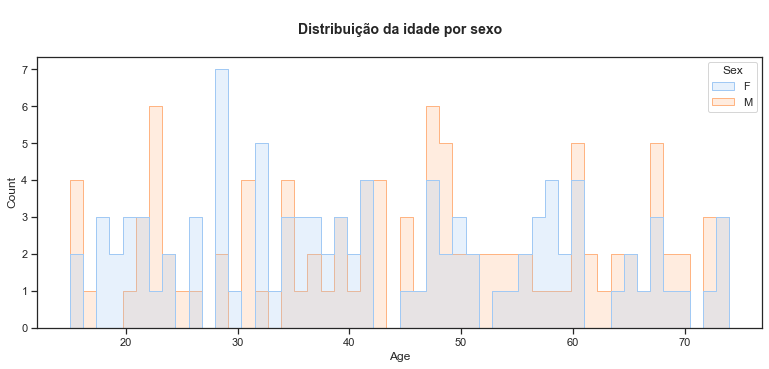

In [12]:
# gráfico de histograma da distribuição da variável Age (idade) X Sex (sexo)
plt.figure(figsize=(13,5))

plt.title('\nDistribuição da idade por sexo\n', 
          {'fontsize': 14,'fontweight': 'bold'})
sns.histplot(data=df, x='Age', hue='Sex', element= 'step', fill=True, bins=50);

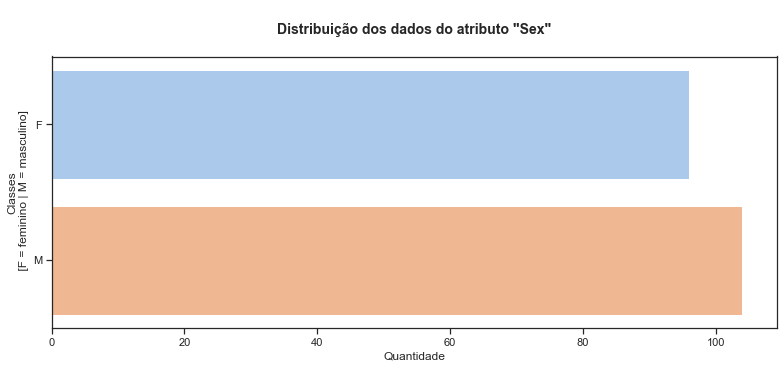

In [13]:
# gráfico de barras da distribuição das observações do atributo "Sex"
plt.figure(figsize=(13,5))

plt.title('\nDistribuição dos dados do atributo "Sex"\n', 
          {'fontsize': 14, 'fontweight': 'bold'})
sns.countplot(data=df, y='Sex')
plt.ylabel('Classes\n [F = feminino | M = masculino]')
plt.xlabel('Quantidade');

In [14]:
# frequências da variávies qualitativas
#qualitative_vars = ['Sex', 'BP', 'Cholesterol', 'Drug']
#qualitative_vars

In [15]:
# instanciando as variáveis qualitativas do conjunto de dados
qualitative_vars = df.select_dtypes(include='object').columns

# visualizando o resultado da seleção
qualitative_vars

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

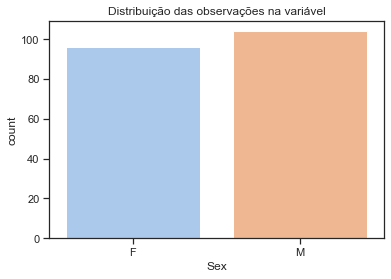

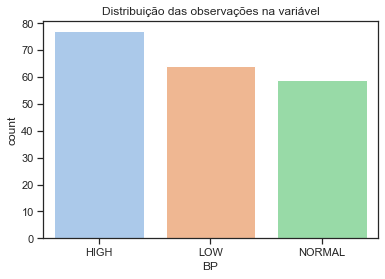

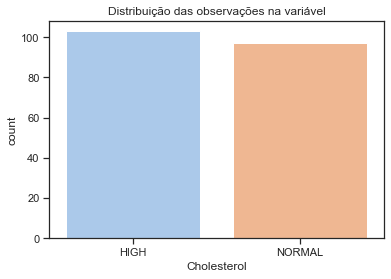

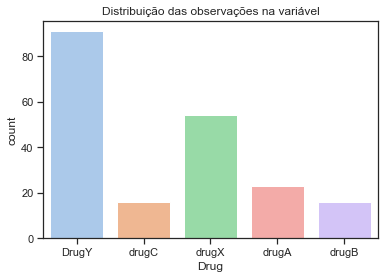

In [16]:
# plotando gráficos de barras da distribuição das observações das variáveis qualitativas
for col in qualitative_vars:
    fig, ax = plt.subplots()
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title('Distribuição das observações na variável')
    plt.show()

> Todas as variáveis estão bem distribuídas, exceto a variável alvo `"Drug"`. <br><br>Isso pode causar problemas de desempenho no algoritmo, visto que, ele pode ficar muito bom em prever uma determinada classe e não tão bom assim em outras. <br>Talvez fosse interessante estudar alguma técnica de balanceamento como **RandomUnderSampler** ou **RandomOverSampler**.

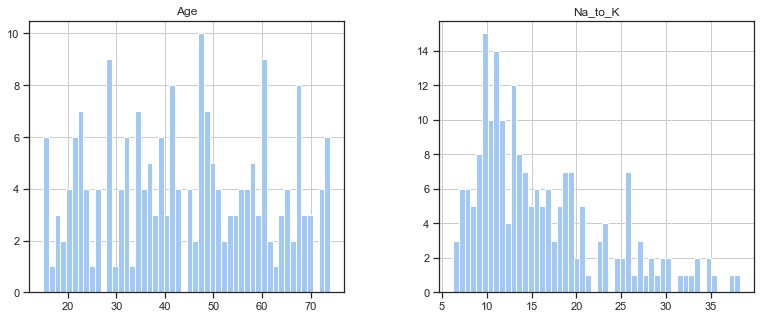

In [17]:
# gráfico de histograma da distribuição das observações das variáveis quantitativas
df.hist(bins=50, figsize=(13,5));

In [20]:
# dados estatístico das variáveis quantitativas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


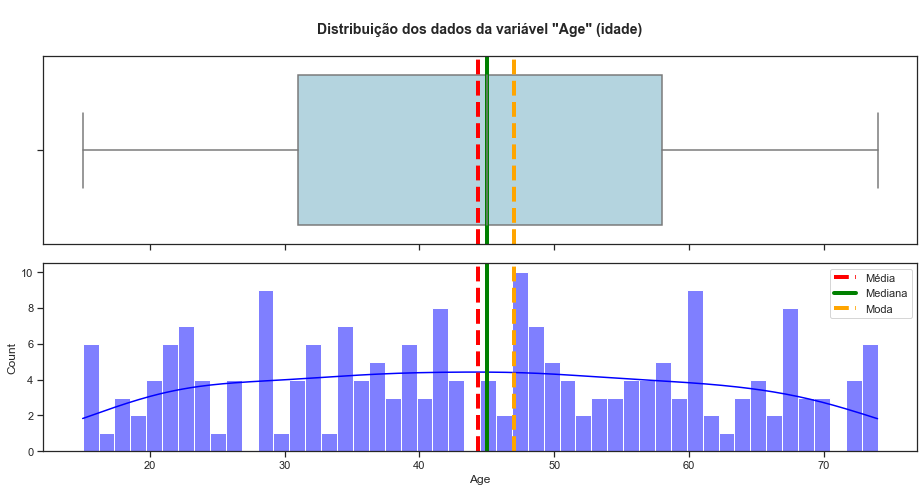

In [21]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "Age" (idade)
mean = df['Age'].mean()     # média
median = df['Age'].median() # mediana
mode = df['Age'].mode()[0]  # moda

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize=(13,7))

sns.boxplot(data=df, x='Age', ax=ax_box, color='lightblue')
ax_box.axvline(mean, color='red', linestyle='--', linewidth=4)
ax_box.axvline(median, color='green', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='orange', linestyle='--', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável "Age" (idade)\n',
                 {'fontsize': 14,'fontweight': 'bold'})

sns.histplot(data=df, x='Age', ax=ax_hist, kde=True, bins=50, color='blue')
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='orange', linestyle='--', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

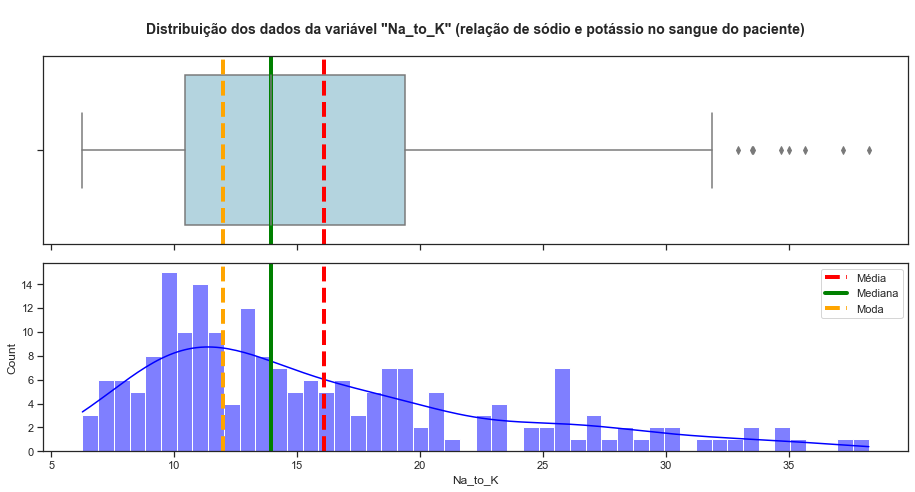

In [22]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "Na_to_K" (relação de sódio e potássio no sangue do paciente)
mean = df['Na_to_K'].mean()     # média        
median = df['Na_to_K'].median() # mediana
mode = df['Na_to_K'].mode()[0]  # moda

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize=(13,7))

sns.boxplot(data=df, x='Na_to_K', ax=ax_box, color='lightblue')
ax_box.axvline(mean, color='red', linestyle='--', linewidth=4)
ax_box.axvline(median, color='green', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='orange', linestyle='--', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável "Na_to_K" (relação de sódio e potássio no sangue do paciente)\n',
                 {'fontsize': 14,'fontweight': 'bold'})

sns.histplot(data=df, x='Na_to_K', ax=ax_hist, kde=True, bins=50, color='blue')
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='orange', linestyle='--', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

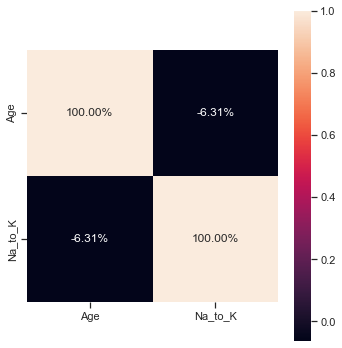

In [23]:
# visualizando a correlação de pearson entre as variáveis quantitativas
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), fmt='0.2%', annot=True, square=True)
plt.tight_layout()

**Preparação dos dados**

In [24]:
# dividindo o conjunto de dados em partes para a modelagem do modelo (treino e validação) e outra parte para teste final do modelo
modeling_data = df.sample(frac=0.9, random_state=42)
test_data = df.drop(modeling_data.index)

# resetando os índices
modeling_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# visualizando a dimensão do particionamento dos dados
print('Dados para modelagem ' + str(modeling_data.shape))
print('Dados para teste: ' + str(test_data.shape))

Dados para modelagem (180, 6)
Dados para teste: (20, 6)


In [26]:
# visualizando as 5 primeiras observações do conjunto de dados para modelagem do modelo
modeling_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,36,M,LOW,NORMAL,11.424,drugX
1,16,F,HIGH,NORMAL,15.516,DrugY
2,18,F,NORMAL,NORMAL,8.750,drugX
3,59,F,LOW,HIGH,10.444,drugC
4,47,M,LOW,NORMAL,33.542,DrugY


In [27]:
# visualizando as 5 primeiras observações do conjunto de dados
test_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,47,M,LOW,HIGH,13.093,drugC
1,50,F,NORMAL,HIGH,12.703,drugX
2,57,M,LOW,NORMAL,19.128,DrugY
3,62,M,LOW,NORMAL,27.183,DrugY
4,28,F,NORMAL,HIGH,19.675,DrugY


In [28]:
# visualizando as 5 primeiras, 5 aleatórias e as 5 últimas observações
display(
    modeling_data.head(),
    modeling_data.sample(5),
    modeling_data.tail()
)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,36,M,LOW,NORMAL,11.424,drugX
1,16,F,HIGH,NORMAL,15.516,DrugY
2,18,F,NORMAL,NORMAL,8.750,drugX
3,59,F,LOW,HIGH,10.444,drugC
4,47,M,LOW,NORMAL,33.542,DrugY


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
139,24,M,NORMAL,HIGH,25.786,DrugY
94,34,F,HIGH,NORMAL,19.199,DrugY
38,16,M,HIGH,NORMAL,19.007,DrugY
2,18,F,NORMAL,NORMAL,8.750,drugX
106,47,F,LOW,HIGH,11.767,drugC


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
175,72,M,LOW,HIGH,16.310,DrugY
176,32,F,NORMAL,HIGH,7.477,drugX
177,39,M,LOW,NORMAL,13.938,drugX
178,53,M,LOW,HIGH,22.963,DrugY
179,72,M,LOW,HIGH,6.769,drugC


Se acaso, seja necessário a instalção da biblioteca do `sklearn`, descomente o código e execute-o.

In [29]:
#pip install sklearn

In [30]:
# importando a função para realizar o particionamento dos dados
from sklearn.model_selection import train_test_split

In [31]:
# particionando os dados do objeto "data_modeling" em dados de treino (train_set) e validação (val_set)
train_set, val_set = train_test_split(modeling_data, test_size=0.3, random_state=42)

In [32]:
# visualizando a quantidade de observações nas partições
print(
    f'Qtde de observações no conjunto de treino: {len(train_set)}',
    f'Qtde de observações no conjunto de validação: {len(val_set)}',
    sep='\n'
)


Qtde de observações no conjunto de treino: 126
Qtde de observações no conjunto de validação: 54



Para aplicação de algoritmos de _machine learning_ é de extrema importância que as observações sejam numéricas, portanto dados qualitativos devem ser realizado algum tipo de transformação.

Existe inúmeras técnicas para essa tarefa de transformação e, para esse nosso problema utilizaremos a função `OrdinalEncncoder`.


In [33]:
# realizando uma cópia do conjunto de dados de treino
df_copy = train_set.copy()

Se acaso, seja necessário a instalção da biblioteca do `category_encoders`, descomente o código e execute-o.

In [34]:
#pip install category_encoders

In [35]:
# importando a biblioteca "category_encoders" e a função "OrdinalEncoder" do sklearn
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder

In [36]:
# instanciando o objeto "encoder_att" com os atributos qualitatvos (categóricos) dos dados de treinamento
encoder_att = ce.OrdinalEncoder(
    cols=[['Sex', 'BP', 'Cholesterol']], return_df=True,
    mapping=[
        {'col': 'Sex', 'mapping': {'F': 0, 'M': 1}}, 
        {'col': 'BP', 'mapping': {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}}, 
        {'col': 'Cholesterol', 'mapping': {'NORMAL': 0, 'HIGH': 1}}]

)

# visualizando o resultado do objeto
encoder_att

OrdinalEncoder(cols=[['Sex', 'BP', 'Cholesterol']],
               mapping=[{'col': 'Sex', 'mapping': {'F': 0, 'M': 1}},
                        {'col': 'BP',
                         'mapping': {'HIGH': 2, 'LOW': 0, 'NORMAL': 1}},
                        {'col': 'Cholesterol',
                         'mapping': {'HIGH': 1, 'NORMAL': 0}}])

In [37]:
# instanciando o objeto "encoder_label" com os atributos qualitatvos (categóricos) dos dados da váriavel alvo
encoder_label = ce.OrdinalEncoder(
    cols=[['Drug']], return_df=True,
    mapping=[
        {'col': 'Drug', 'mapping': {'drugX': 0, 'DrugY': 1, 'drugC': 2, 'drugB': 3}}]
)

encoder_label

OrdinalEncoder(cols=[['Drug']],
               mapping=[{'col': 'Drug',
                         'mapping': {'DrugY': 1, 'drugB': 3, 'drugC': 2,
                                     'drugX': 0}}])

Agora a próxima etapa é realizar a _padrponização dos dados_, também conhecido com `escalonamento` dos dados, isto é, deixar as variáveis numéricas em escalas próximas.

"... mantendo a informação estatística dos dados, é realizar uma transformação sobre o conjunto original dos dados de modo que cada variável apresente média zero e variância igual a um (autoescalonamento)."

**Saiba mais em:**
- https://www.scielo.br/j/qn/a/b64d96fbT5jMHmnc48SdXnr/?lang=pt

Os algoritmos `SVM's` são muito sensíveis a alta variabilidade dos dados. Para obtermos melhores resultados é importante à realização dessa estapa de _escalonamento_, pois as fronteiras de decisão se ajustam melhor com os dados em escala.

Utlizaremos o algortimo `StandardScaler` para essa necessidade.

Como forma de otimização das etapas da transformação dos dados, farei uso da classe `Pipeline` do _sklearn_.

In [38]:
# importando a classe "Pipeline" do sklearn
from sklearn.pipeline import Pipeline

# importando a funçõa para realizar o escalonamento dos dados
from sklearn.preprocessing import StandardScaler

# importando as funções para auxiliar na aplicação da transfromação dos dados
from sklearn.compose import ColumnTransformer,\
                            make_column_selector as selector

In [39]:
# instanciando as variáveis explicativas (X) e a resposta (y) da cópia do conjunto de dados (df_copy) para aplicação das transformações
X, y = df_copy.drop('Drug', axis=1), df_copy[['Drug']]

In [40]:
# visualizando as 5 primeiras observações da variável X
print(type(X))
X[:5]

<class 'pandas.core.frame.DataFrame'>


,Age,Sex,BP,Cholesterol,Na_to_K
46,45,M,LOW,HIGH,17.951
85,59,M,HIGH,HIGH,13.935
152,50,F,NORMAL,NORMAL,17.211
82,37,F,HIGH,HIGH,13.091
147,50,M,HIGH,HIGH,7.490


In [41]:
# visualizando as 5 primeiras observações da variável y
print(type(y))
y[:5]

<class 'pandas.core.frame.DataFrame'>


,Drug
46,DrugY
85,drugB
152,DrugY
82,drugA
147,drugA


In [42]:
# instanciando os objetos para realizar a separação dos atributos numéricos e categóricos
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# aplicando os objetos acima e realizando a separação dos atributos conforme sua distinção
numerical_att_columns = numerical_columns_selector(X)
categorical_att_columns = categorical_columns_selector(X)
categorical_label = categorical_columns_selector(y)

In [43]:
# visualizando os atributos selecionados por cada objeto
numerical_att_columns, categorical_att_columns, categorical_label

(['Age', 'Na_to_K'], ['Sex', 'BP', 'Cholesterol'], ['Drug'])

In [44]:
# instanciando o objeto "Pipeline" na variável "num_pipeline" dos atributos numéricos
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

# visualizando o resultado
num_pipeline

Pipeline(steps=[('std_scaler', StandardScaler())])

In [45]:
# aplicando os objetos "num_pipeline" (atributos numéricos) e "encoder_att" (atributos categóricos) das variáveis explicativas
full_pipeline_att = ColumnTransformer([
    ('num', num_pipeline, numerical_att_columns),
    ('cat', encoder_att, categorical_att_columns)
])

# visualizando o resultado
full_pipeline_att

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('std_scaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 OrdinalEncoder(cols=[['Sex', 'BP',
                                                       'Cholesterol']],
                                                mapping=[{'col': 'Sex',
                                                          'mapping': {'F': 0,
                                                                      'M': 1}},
                                                         {'col': 'BP',
                                                          'mapping': {'HIGH': 2,
                                                                      'LOW': 0,
                                                                      'NORMAL': 1}},
                                            

In [46]:
# instanciando o objeto "full_pipeline" e utilizando a função "ColumnTransformer" para aplicar as transformações nas variáveis categóricas
full_pipeline_label = ColumnTransformer([
    ('cat', encoder_label, categorical_label)
])

full_pipeline_label

ColumnTransformer(transformers=[('cat',
                                 OrdinalEncoder(cols=[['Drug']],
                                                mapping=[{'col': 'Drug',
                                                          'mapping': {'DrugY': 1,
                                                                      'drugB': 3,
                                                                      'drugC': 2,
                                                                      'drugX': 0}}]),
                                 ['Drug'])])

In [47]:
# aplicando o objeto "full_pipeline_att" e o "full_pipeline_label" nas respectivas variávies X e y e realizando o treinamento e a transformação dos dados
X_final = full_pipeline_att.fit_transform(X)
y_final = full_pipeline_label.fit_transform(y)

In [48]:
# visualizando as 5 primeiras observações e suas transformações realizadas da variável "X_final"
X_final[:5]

array([[ 0.06391245,  0.3315393 ,  1.        ,  0.        ,  1.        ],
       [ 0.91801526, -0.21928018,  1.        ,  2.        ,  1.        ],
       [ 0.36894917,  0.23004368,  0.        ,  1.        ,  0.        ],
       [-0.42414629, -0.33504005,  0.        ,  2.        ,  1.        ],
       [ 0.36894917, -1.10325217,  1.        ,  2.        ,  1.        ]])

In [49]:
# visualizando as 5 primeiras observações e suas transformações realizadas da variável "y_final"
y_final[:5]

array([[ 1.],
       [ 3.],
       [ 1.],
       [-1.],
       [-1.]])

**Treinando e avaliando o modelo `SVM`**

Finalmente chegamos na etapa de aplicação do _SVM_, porém há algumas particularidades referente ao algoritmo em questão que devemos se atentar.

Como o objetivo principal do _SVM_ é encontrar um `bom equilibrio entre manter a margem maior possível e limitar as violações de margem`, ou seja, observações que terminam no meio da margem ou na margem errada e, isso é conhecido como `classificação de margem suave`, podemos especificar alguns hiperparâmetros, como a regularização `"C"`.
- se especificar muito baixo, teremos grandes quantidades de violação de margem.
- e ao contrário, especificando muito alto, teremos bem menos violação de margem.

Então o nosso desafio é encontrar esse equilíbrio, entretanto, é melhor ter algumas _violações de margem_, pois assim a capacidade de generalização do modelo é melhor.

Para esse primeiro treinamento do modelo, utilizaremos a classe `LinearSVC` e, também poderíamos utilizar a classe `SVC` especificando o _hiperparâmetro_, "`kernel='linear'"`. Nesse caso específico, iríamos considerar que os dados tivessem uma separação linear.

Vamos para aplicação do modelo!

In [50]:
# criando uma cópia dos dados
X_cv = X_final.copy()
y_cv = y_final.copy()

In [51]:
# importando a função "LinearSVC"
from sklearn.svm import LinearSVC

In [52]:
# importando a função de métrica da validação cruzada
from sklearn.model_selection import cross_val_score

In [53]:
# instanciando o modelo
linearSVC_model = LinearSVC(random_state=42)
linearSVC_model

LinearSVC(random_state=42)

In [54]:
# aplicando o modelo
linearSVC_scores = cross_val_score(
    linearSVC_model, X_cv, y_cv,
    scoring='f1_macro', cv=3
)

# visualizando o resultado
linearSVC_scores

array([0.69285714, 0.95353535, 0.81850226])

In [55]:
# instanciando o resultado na variável "linearSVC_f1score"
linearSVC_f1score = linearSVC_scores

def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Média: {scores.mean()}')
    print(f'Desvio-padrão: {scores.std()}')

In [56]:
# avaliando o modelo
display_scores(linearSVC_f1score)

Scores: [0.69285714 0.95353535 0.81850226]
Média: 0.8216315868040006
Desvio-padrão: 0.10644443582268823


> O `F1 score` foi de aproximadamente de _0,82_.

Será que podemos melhorar esse resultado?

Para isso, utilizaremos uma abordagem _não linear_, utilizando a especificação do **kernel** e, por fim avaliar o modelo novamente.

**Tipos de Kernel**

- `Kernel polinomial`

Uma forma de lidar com conjuntos de dados que não são separáveis linearmente, é utilizar a adição de características polinomiais (PolynomialFeatures). Essa classe é simples de se implementar e pode funcionar muito bem com todos os tipos de algoritmos de machine learning. Dessa forma, quando se trata de um baixo grau polinomial, esse método não pode lidar com conjunto de dados muito complexos e, se tratando de um alto grau polinomial, ele cria um grande número de características, fazendo com que o modelo fique bem lento. É aqui
que entra o kernel. Essa técnica é uma alternativa a `"polynomial features"`.

Conforme introduzimos acima, com as SVMs, podemos empregar uma técnica matemática poderosa (não iremos entrar em detalhes aqui), que se chama **truque do kernel**. Esse método possibilita obter o mesmo resultado, como se você tivesse adicionado muitas _características polinomiais_, mesmo com polinômios de alto grau, sem adicioná-las na prática. Assim, não ocorre uma explosão combinatória do número de características, porque você não adiciona
nenhuma. Esse truque é implementado pela classe SVC.


![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTGmurrTLcHoWQZRQlAZqGWkcoOAADQaDX0ag&usqp=CAU)

> Em essência, o que o truque do kernel faz por nós é oferecer uma maneira mais eficiente e menos dispendiosa (em comparação com a polynomial features, por exemplo) de transformar dados em dimensões mais altas.

- `Kernel gaussiano RBF`

Outra técnica para lidar com problemas não lineares é adicionar características calculadas usando uma função de similaridade, que computa o quanto cada instância se assemelha a um ponto de referência específico. Sem entrar em muitos detalhes aqui, a idéia é basicamente a mesma do kernel polinomial, porém ao invés de utilizar características polinomiais, utilizaremos características de similaridade.

Esse kernel vem como default da classe SVC na scikit-learn e é ele que iremos utilizar no código abaixo. Pórem devemos tomar o cuidado com o _overfitting_.

In [57]:
# importando a função "SVC"
from sklearn.svm import SVC

In [58]:
# instanciando o modelo e especificando o "kernel='rbf'"
rbfSVC_model = SVC(kernel='rbf', random_state=42)
rbfSVC_model

SVC(random_state=42)

In [59]:
# aplicando o modelo
rbfSVC_scores = cross_val_score(
    rbfSVC_model, X_cv, y_cv,
    scoring='f1_macro', cv=3
)

# visualizando o resultado
rbfSVC_scores

array([0.91666667, 0.89016377, 0.83128205])

In [60]:
# avaliando o modelo
display_scores(rbfSVC_scores)

Scores: [0.91666667 0.89016377 0.83128205]
Média: 0.8793708298869589
Desvio-padrão: 0.03568378558978193


> Conseguimos melhorar um pouco os resultados!

**Validando o modelo `SVM`**

Agora, utilizaremos o conjunto de validação e, posteriormente avaliaremos os resultados do modelo.

In [61]:
# criando uma cópia do conjunto de dados de validação
df_val = val_set.copy()

In [62]:
# separando as variáveis explicativas (dependentes) e a variável resposta (independente)
X_val = df_val.drop('Drug', axis=1)
y_val = df_val[['Drug']]

In [63]:
# aplicando o pipeline de preparação dos dados do conjunto de validação
X_val_final = full_pipeline_att.fit_transform(X_val)
y_val_final = full_pipeline_label.fit_transform(y_val)

In [64]:
# aplicando o modelo 
val_model = LinearSVC(random_state=42)
val_model.fit(X_cv, y_cv)

LinearSVC(random_state=42)

In [66]:
# realizando as predições com os dados de validação
y_pred = val_model.predict(X_val_final)
y_pred

array([ 1.,  0.,  1., -1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0., -1.,
        1.,  2.,  3.,  1.,  2.,  0., -1.,  1.,  1.,  1.,  1.,  0.,  1.,
       -1.,  2., -1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,
        2.,  1.,  0.,  1.,  1.,  1.,  2.,  1.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.])

In [67]:
# importando as funções para relatório do modelo
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             confusion_matrix, 
                             classification_report)

In [68]:
print(classification_report(y_val_final, y_pred))

              precision    recall  f1-score   support

        -1.0       0.60      1.00      0.75         3
         0.0       1.00      1.00      1.00        14
         1.0       1.00      0.91      0.95        32
         2.0       0.60      1.00      0.75         3
         3.0       1.00      0.50      0.67         2

    accuracy                           0.93        54
   macro avg       0.84      0.88      0.82        54
weighted avg       0.96      0.93      0.93        54



In [69]:
print(f'Acurácia geral: {accuracy_score(y_val_final, y_pred)}')
print(f'Precisão geral: {precision_score(y_val_final, y_pred, average="macro")}')
print(f'Recall geral: {recall_score(y_val_final, y_pred, average="macro")}')

Acurácia geral: 0.9259259259259259
Precisão geral: 0.8400000000000001
Recall geral: 0.88125


              precision    recall  f1-score   support

        -1.0       0.60      1.00      0.75         3
         0.0       1.00      1.00      1.00        14
         1.0       1.00      0.91      0.95        32
         2.0       0.60      1.00      0.75         3
         3.0       1.00      0.50      0.67         2

    accuracy                           0.93        54
   macro avg       0.84      0.88      0.82        54
weighted avg       0.96      0.93      0.93        54

Acurácia geral: 0.9259259259259259
Precisão geral: 0.8400000000000001
Recall geral: 0.88125


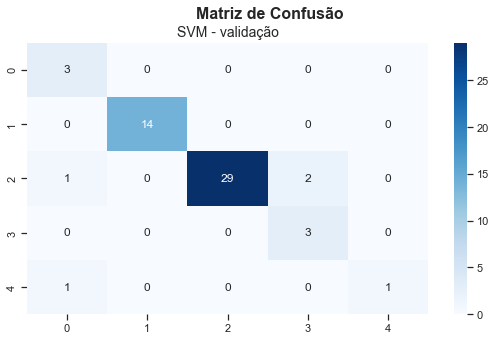

In [76]:
# imprimindo o relatório de classificação dos dados de validação do modelo
print(classification_report(y_val_final, y_pred))

print(f'Acurácia geral: {accuracy_score(y_val_final, y_pred)}')
print(
    f'Precisão geral: {precision_score(y_val_final, y_pred, average="macro")}')
print(
    f'Recall geral: {recall_score(y_val_final, y_pred, average="macro")}')

# visualizando graficamente a matriz de confusão dos dados de validação do modelo
fig = plt.figure(figsize=[9, 5])
fig.suptitle('Matriz de Confusão\n', fontsize=16, fontweight='bold')

sns.heatmap(confusion_matrix(y_val_final, y_pred),
            cmap='Blues', annot=True, fmt='.0f')
plt.title('SVM - validação', fontsize=14)
plt.xticks()
plt.yticks()

plt.show()


> Com o _plot_ da `Matriz de Confusão` podemos melhor visualizar os resultados de acertos e erros do modelo.<br><br> Para a **classe 2**, de 32 observações no total, 3 foram classificadas erradas, ou seja, aproximadamente 9% de erro. <br>E para a **classe 4** que possui somente duas observações, uma classificada erroneamente, 50% de erro. <br>Já para as demais classes, 100% de acertos!

**Testando o modelo**

Por fim, utilizaremos o conjunto de dados `test_data` para testarmos o nosso modelo final

In [70]:
# criando uma cópia do conjunto de dados de teste
df_test = test_data.copy()

In [71]:
# separando as variáveis explicativas (dependentes) e a variável resposta (independente)
X_test = df_test.drop('Drug', axis=1)
y_test = df_test[['Drug']]

In [72]:
# aplicando o pipeline de preparação dos dados do conjunto de teste
X_test_final = full_pipeline_att.fit_transform(X_test)
y_test_final = full_pipeline_label.fit_transform(y_test)


In [73]:
# aplicando o modelo
test_model = LinearSVC(random_state=42)
test_model.fit(X_cv, y_cv)


LinearSVC(random_state=42)

In [74]:
# realizando as predições com os dados de teste
y_pred_final = val_model.predict(X_test_final)
y_pred_final


array([2., 0., 1., 1., 1., 1., 2., 1., 1., 2., 0., 0., 0., 1., 1., 2., 3.,
       1., 1., 0.])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.91      0.95        11
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         1

    accuracy                           0.95        20
   macro avg       0.94      0.98      0.95        20
weighted avg       0.96      0.95      0.95        20

Acurácia geral: 0.95
Precisão geral: 0.9375
Recall geral: 0.9772727272727273


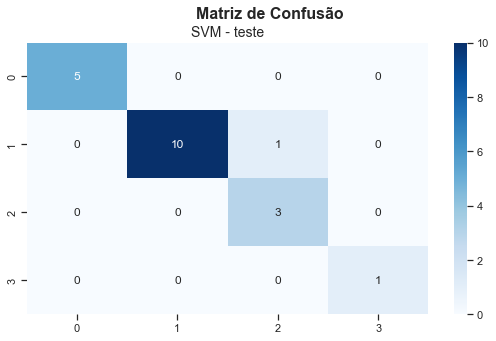

In [75]:
# imprimindo o relatório de classificação dos dados de teste do modelo
print(classification_report(y_test_final, y_pred_final))

print(f'Acurácia geral: {accuracy_score(y_test_final, y_pred_final)}')
print(f'Precisão geral: {precision_score(y_test_final, y_pred_final, average="macro")}')
print(f'Recall geral: {recall_score(y_test_final, y_pred_final, average="macro")}')

# visualizando graficamente a matriz de confusão dos dados de teste do modelo
fig = plt.figure(figsize=[9, 5])
fig.suptitle('Matriz de Confusão\n', fontsize=16, fontweight='bold')

sns.heatmap(confusion_matrix(y_test_final, y_pred_final),
            cmap='Blues', annot=True, fmt='.0f')
plt.title('SVM - teste', fontsize=14)
plt.xticks()
plt.yticks()

plt.show()


> Com o _plot_ da `Matriz de Confusão` do conjunto de dados de teste (`test_data`) tivemos resultados melhores com as predições.<br><br> Somente a **classe 1**, teve uma observação classificada errada entre 11 observações no total. <br>E as demais classes, 100% de acertos! <br><br>Aliás, todas as métricas apresentaram resultadas **excelentes** como podemos ver acima!

#### **Conclusão final**

Passamos brevemente por algumas etapas de um projeto de `Ciência de Dados` com foco em entender melhor como funciona o algoritmo SVM. Neste projeto passamos por:
- Introdução;
- Coleta dos dados;
- Análise exploratória dos dados;
- Preparação dos dados;
- Treinar e avaliar alguns modelos SVM;
- Teste do modelo final.


**Info**

Projeto desenvolvido utilizando a _IDE_ `VS Code` e a extensão para `Jupyter Notebook`.